In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy import constants
%matplotlib inline

Defining the Variables

In [99]:
# Parametersfor the benchmarking
fps=295
num_particles=1000
dt=1/fps
spatial_resolution=30E-06  # in microns per px
dust_diameter=7.14E-6 # in metres
dust_rho=1510.0
mu = 0
mass = 4.0 / 3.0 * np.pi * ( dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
# print(mass)
kb=constants.Boltzmann
T=10000 #temperature in Kelvin
sigma = np.sqrt(kb*T/mass)
print(sigma)

left=0
right=1751 # right border in px
up=1667
left_SI=left*spatial_resolution
right_SI=right*spatial_resolution

0.0006926383579377664


Generating initial x coordinates

In [100]:
# Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
unif_x = sts.uniform(left_SI, right_SI-left_SI)
sample_x=unif_x.rvs(num_particles)
# print(sample_v)
# fig, ax = plt.subplots()
# ax.hist(sample_v,100) # plot histogram
# ax.set_xlabel('x')
# ax.set_ylabel('measurements')
# print(sample_x_trunc)
# print(sample_x)
sample_x_in_resol= sample_x/spatial_resolution
# print(sample_x_trunc)
sample_x_trunc= sample_x_in_resol.astype(int)
# print(sample_x_trunc)
sample_x_trunc_SI=sample_x_trunc*spatial_resolution
# print(sample_x_trunc_SI)
# print(sample_x_SI)

In [101]:
part_no = np.arange(0,num_particles,dtype = 'int') # array of particles ID numbers
# part_no

Generating velocities

Text(0, 0.5, 'measurements')

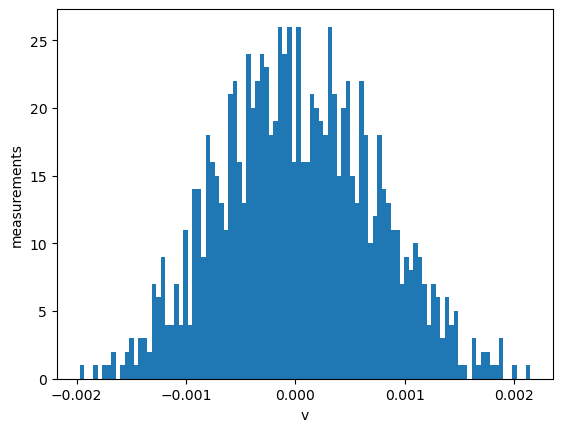

In [102]:
# Generate a sample of 1000 random velocities from a normal distribution
norm_rv = sts.norm(mu, sigma)
sample_vx = norm_rv.rvs(num_particles) #generate a sample of certain size
# print(sample_v)
fig, ax = plt.subplots()
ax.hist(sample_vx, 100) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Text(0, 0.5, 'measurements')

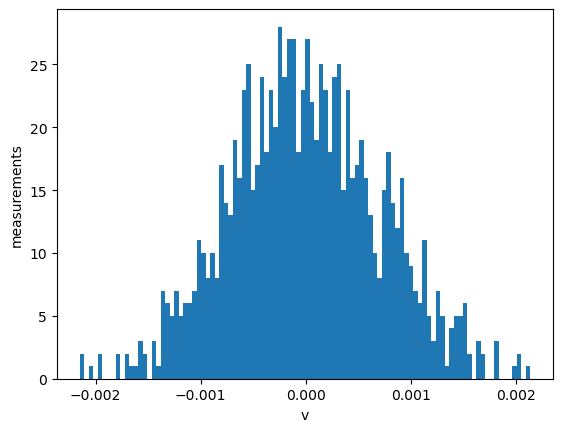

In [103]:
# Generate a sample of 1000 random velocities from a normal distribution
norm_rv = sts.norm(mu, sigma)
sample_vy = norm_rv.rvs(num_particles) #generate a sample of certain size
# print(sample_v)
fig, ax = plt.subplots()
ax.hist(sample_vy, 100) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Calculating cordinates in next frame

Text(0, 0.5, 'measurements')

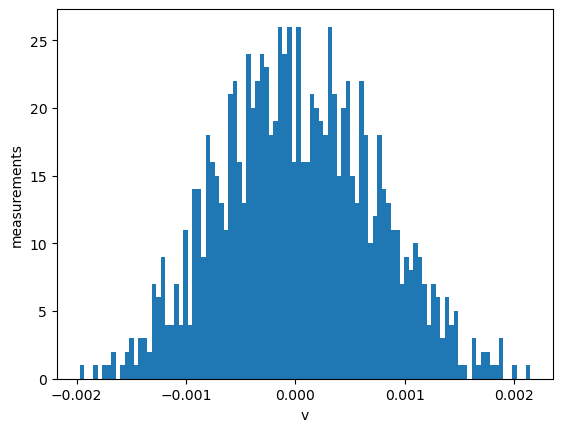

In [104]:
# Simulating the motion of the particles
x_forward=sample_x+sample_vx*dt
x_forward_in_resol=x_forward/spatial_resolution
x_forward_trunc=x_forward_in_resol.astype(int)
# print(x_forward_trunc)
x_forward_SI=x_forward_trunc*spatial_resolution
# print(x_forward_SI)
fig, ax = plt.subplots()
ax.hist(sample_vx, 100) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Calculating the discrepancies

In [105]:
# Calculating restored velocities
v_restored=(x_forward_SI- sample_x)/dt
# print(v_restored)

# Calculating the discrepancy between the original and restored velocities
discrepancy=np.abs(sample_vx-v_restored)
print(np.mean(discrepancy))
frac_discrepancy=np.abs(discrepancy/sample_vx)
print(np.mean(frac_discrepancy))
percent_discrepancy=frac_discrepancy*100
print(np.mean(percent_discrepancy))

0.004450387956157294
234.33251280772276
23433.251280772285


Code to make the y coordinates

In [106]:
# Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
unif_y = sts.uniform(left_SI, right_SI-left_SI)
sample_y=unif_y.rvs(num_particles)
sample_y_in_resol= sample_y/spatial_resolution
# print(sample_x_trunc)
sample_y_trunc= sample_y_in_resol.astype(int)
# print(sample_x_trunc)
sample_y_trunc_SI=sample_y_trunc*spatial_resolution
# print(sample_y_trunc_SI
    #   )
# print(sample_x_SI)

Text(0, 0.5, 'measurements')

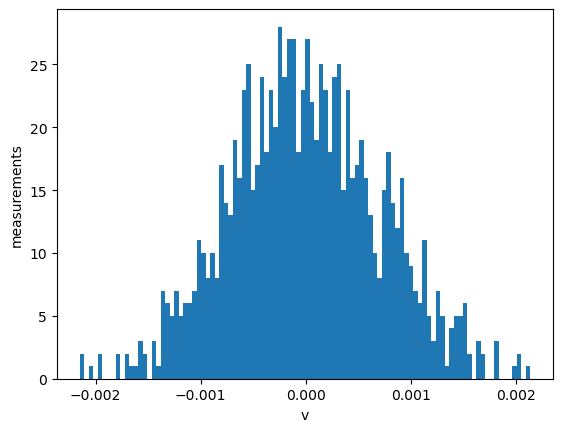

In [107]:
# Simulating the motion of the particles
y_forward=sample_y+sample_vy*dt
y_forward_in_resol=y_forward/spatial_resolution
y_forward_trunc=y_forward_in_resol.astype(int)
# print(x_forward_trunc)
x_forward_SI=x_forward_trunc*spatial_resolution
# print(x_forward_SI)
fig, ax = plt.subplots()
ax.hist(sample_vy, 100) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Making the database of co-ordinates

In [108]:
def make_coord_df(init_frame,final_frame, num_particles, sample_x_trunc_SI, sample_y_trunc_SI, sample_vx,sample_vy):
    frame_data = []
    while init_frame <= final_frame:
        for j in range(num_particles):
            # Append the data for the current frame
            frame_data.append([sample_x_trunc_SI[j], sample_y_trunc_SI[j], j,sample_vx[j],sample_vy[j],init_frame])

        # Simulating the motion of the particles for x coordinates
        x_forward = sample_x_trunc_SI + sample_vx * dt
        x_forward_in_resol = x_forward / spatial_resolution
        x_forward_trunc = x_forward_in_resol.astype(int)
        sample_x_trunc_SI = x_forward_trunc * spatial_resolution

        # Simulating the motion of the particles for y coordinates
        y_forward = sample_y_trunc_SI + sample_vy * dt
        y_forward_in_resol = y_forward / spatial_resolution
        y_forward_trunc = y_forward_in_resol.astype(int)
        sample_y_trunc_SI= y_forward_trunc * spatial_resolution

        init_frame += 1
    # Create a DataFrame
    x_y_df = pd.DataFrame(frame_data, columns=['x', 'y', 'part_no', 'vx (unrestored)','vy (unrestored)','frame'])
    return x_y_df


In [109]:
coord_df=make_coord_df(0,2, num_particles, sample_x_trunc_SI, sample_y_trunc_SI,sample_vx,sample_vy)
coord_df.head()

,x,y,part_no,vx (unrestored),vy (unrestored),frame
0,0.01809,0.04650,0,-0.000364,-0.000413,0
1,0.02340,0.00387,1,-0.000406,0.000730,0
2,0.04089,0.03054,2,-0.000334,-0.000183,0
3,0.01254,0.03558,3,0.000432,-0.000759,0
4,0.03780,0.04155,4,-0.000276,0.001312,0


Function to get the discrepancies

In [110]:
def get_discrepancies(v_restored,v_actual):
    discrepancy = np.abs(v_actual - v_restored)
    # print(np.mean(discrepancy))
    frac_discrepancy = np.abs(discrepancy / v_actual)
    # print(np.mean(frac_discrepancy))
    percent_discrepancy = frac_discrepancy*100
    # print(np.mean(percent_discrepancy))
    return np.mean(percent_discrepancy)

In [111]:
get_discrepancies(v_restored,sample_vx)

23433.251280772285

Function to create the database of velocities

In [112]:
def make_velocities(fps,num_particles,spatial_resolution, mu,T, right_border_px, up_border_px):
    init_frame=1
    final_frame=2 #using it as 2 now will parametrise it when making a general function
    dt=1/fps
    dust_diameter=7.14E-6 
    dust_rho=1510.0
    mass = 4.0 / 3.0 * np.pi * (dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
    # print(mass)
    kb=constants.Boltzmann
    sigma = np.sqrt(kb*T/mass)
    # print(sigma)
    left=0
    down=0
    down_SI=down*spatial_resolution
    left_SI=left*spatial_resolution
    up_SI=up_border_px*spatial_resolution
    right_SI=right_border_px*spatial_resolution
    # Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
    unif_x = sts.uniform(left_SI, right_SI-left_SI)
    sample_x=unif_x.rvs(num_particles)
    sample_x_in_resol= sample_x/spatial_resolution
    sample_x_trunc= sample_x_in_resol.astype(int)
    sample_x_trunc_SI=sample_x_trunc*spatial_resolution

    unif_y = sts.uniform(down_SI, up_SI-down_SI)
    sample_y=unif_y.rvs(num_particles)
    sample_y_in_resol= sample_y/spatial_resolution
    sample_y_trunc= sample_y_in_resol.astype(int)
    sample_y_trunc_SI=sample_y_trunc*spatial_resolution
    # Generate a sample of 1000 random velocities from a normal distribution
    norm_rv = sts.norm(mu, sigma)
    sample_vx = norm_rv.rvs(num_particles) #generate a sample of certain size
    norm_rv = sts.norm(mu, sigma)
    sample_vx = norm_rv.rvs(num_particles) #generate a sample of certain size
    coord_df=make_coord_df(init_frame,final_frame, num_particles, sample_x_trunc_SI, sample_y_trunc_SI,sample_vx,sample_vy)
    

    
    return coord_df

In [113]:
make_velocities(fps,num_particles,spatial_resolution, mu,T, right, up)

,x,y,part_no,vx (unrestored),vy (unrestored),frame
0,0.04779,0.00468,0,-0.000149,-0.000413,1
1,0.04992,0.01608,1,0.000344,0.000730,1
2,0.05106,0.03477,2,-0.000461,-0.000183,1
3,0.04458,0.04059,3,0.000109,-0.000759,1
4,0.00246,0.02049,4,-0.000520,0.001312,1
...,...,...,...,...,...,...
1995,0.02997,0.04248,995,-0.001149,-0.000442,2
1996,0.01989,0.04863,996,-0.000704,0.000058,2
1997,0.03990,0.03924,997,0.000741,-0.000895,2
1998,0.03522,0.03267,998,-0.000607,0.000427,2
